Importing the csv file as a Dataframe , as well as other required libraries for proccessing the data

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
df=pd.read_csv(r"c:\DataScience\EDA_Datasets\mobile_game_purchases.csv")
df

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,29f9fea9-591d-4e9f-a662-958655d3eb4a,19.0,Female,Iran,Android,Fighting,7,34.81,Minnow,12.48,16.0,Google Pay,2025-05-28
3020,c906eb00-fb33-4bf2-97a4-311634cd0d7a,48.0,Male,Switzerland,iOS,Adventure,9,19.45,Minnow,14.77,14.0,Carrier Billing,2025-07-25
3021,26e17717-ebec-42a9-aae2-2eff66888119,44.0,Male,France,Android,Card,15,20.54,Minnow,16.69,24.0,Gift Card,2025-01-25
3022,4d6e2bfb-cb11-411a-942c-4fb7a4832088,45.0,Male,Sweden,iOS,Fighting,8,14.48,Minnow,17.29,15.0,Paypal,2025-05-07


Taking data sample for reference

In [375]:
print(df.head(),df.tail(),sep="\n")

                                 UserID   Age  Gender      Country   Device  \
0  c9889ab0-9cfc-4a75-acd9-5eab1df0015c  49.0    Male       Norway  Android   
1  7c9e413c-ecca-45f2-a780-2826a07952a2  15.0    Male  Switzerland      iOS   
2  fd61e419-1a92-4f43-a8c7-135842ad328a  23.0    Male        China  Android   
3  bdb7f6d1-ff9a-468c-afe7-43f32a94293e  31.0    Male       Mexico  Android   
4  aa7eec14-4846-47b9-b879-9c98038cda04  37.0  Female        India  Android   

       GameGenre  SessionCount  AverageSessionLength SpendingSegment  \
0  Battle Royale             9                 12.83          Minnow   
1     Action RPG            11                 19.39          Minnow   
2       Fighting             9                  8.87          Minnow   
3         Racing            12                 19.56          Minnow   
4  Battle Royale            10                 15.23          Minnow   

   InAppPurchaseAmount  FirstPurchaseDaysAfterInstall PaymentMethod  \
0                11.4

1. Check the datatypes to find errors or null-values if any

In [376]:
df.info()
#age is float , first purchase is float ,last purchase date is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         3024 non-null   object 
 1   Age                            2964 non-null   float64
 2   Gender                         2964 non-null   object 
 3   Country                        2964 non-null   object 
 4   Device                         2964 non-null   object 
 5   GameGenre                      2964 non-null   object 
 6   SessionCount                   3024 non-null   int64  
 7   AverageSessionLength           3024 non-null   float64
 8   SpendingSegment                3024 non-null   object 
 9   InAppPurchaseAmount            2888 non-null   float64
 10  FirstPurchaseDaysAfterInstall  2888 non-null   float64
 11  PaymentMethod                  2888 non-null   object 
 12  LastPurchaseDate               2888 non-null   o

2. Find all the null values in the given data

In [377]:
df.isna().sum()

UserID                             0
Age                               60
Gender                            60
Country                           60
Device                            60
GameGenre                         60
SessionCount                       0
AverageSessionLength               0
SpendingSegment                    0
InAppPurchaseAmount              136
FirstPurchaseDaysAfterInstall    136
PaymentMethod                    136
LastPurchaseDate                 136
dtype: int64

3. Remove unwanted columns like UserID ,

In [378]:
df.drop(columns=["UserID","LastPurchaseDate"],inplace=True)
df.isna().sum()

Age                               60
Gender                            60
Country                           60
Device                            60
GameGenre                         60
SessionCount                       0
AverageSessionLength               0
SpendingSegment                    0
InAppPurchaseAmount              136
FirstPurchaseDaysAfterInstall    136
PaymentMethod                    136
dtype: int64

2. Impute the null values

In [379]:
#Imputation of device data,Gender
df["Device"]=df["Device"].fillna(random.choice(["Android","iOS"]))
df["Gender"]=df["Gender"].fillna(random.choice(["Male","Female","Other"]))

lyst=["Country","GameGenre","PaymentMethod"]
for i in lyst:
    df[i]=df[i].fillna(random.choice(df[i].unique()))

list2=["Age","FirstPurchaseDaysAfterInstall","InAppPurchaseAmount"]
for j in list2:
    df[j]=df[j].fillna(df[j].median())

df.isna().sum()

Age                              0
Gender                           0
Country                          0
Device                           0
GameGenre                        0
SessionCount                     0
AverageSessionLength             0
SpendingSegment                  0
InAppPurchaseAmount              0
FirstPurchaseDaysAfterInstall    0
PaymentMethod                    0
dtype: int64

3. Convert/Alter the required datatype objects

In [380]:
intlist=["Age","FirstPurchaseDaysAfterInstall"]
for k in intlist:
    df[k]=df[k].astype(int)
df


,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod
0,49,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28,Apple Pay
1,15,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18,Debit Card
2,23,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30,Apple Pay
3,31,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9,Debit Card
4,37,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15,Paypal
...,...,...,...,...,...,...,...,...,...,...,...
3019,19,Female,Iran,Android,Fighting,7,34.81,Minnow,12.48,16,Google Pay
3020,48,Male,Switzerland,iOS,Adventure,9,19.45,Minnow,14.77,14,Carrier Billing
3021,44,Male,France,Android,Card,15,20.54,Minnow,16.69,24,Gift Card
3022,45,Male,Sweden,iOS,Fighting,8,14.48,Minnow,17.29,15,Paypal


4. Change gender into binary as to save storage and increase efficiency

In [381]:
df["Gender"]=df["Gender"].str.replace("Other","2")
df["Gender"]=df["Gender"].str.replace("Male","1")
df["Gender"]=df["Gender"].str.replace("Female","0")
df["Gender"]=df["Gender"].astype(int)
df["Gender"].value_counts()

1    1810
0    1158
2      56
Name: Gender, dtype: int64

5. Change "InAppPurchaseAmount" to "PurchaseAmount" and from $ to INR

In [382]:
df.rename(columns={"InAppPurchaseAmount":"PurchaseAmount"},inplace=True)
df["PurchaseAmount"]=df["PurchaseAmount"]*80
df

,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,PurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod
0,49,1,Norway,Android,Battle Royale,9,12.83,Minnow,912.0,28,Apple Pay
1,15,1,Switzerland,iOS,Action RPG,11,19.39,Minnow,509.6,18,Debit Card
2,23,1,China,Android,Fighting,9,8.87,Minnow,1264.8,30,Apple Pay
3,31,1,Mexico,Android,Racing,12,19.56,Minnow,1079.2,9,Debit Card
4,37,0,India,Android,Battle Royale,10,15.23,Minnow,868.8,15,Paypal
...,...,...,...,...,...,...,...,...,...,...,...
3019,19,0,Iran,Android,Fighting,7,34.81,Minnow,998.4,16,Google Pay
3020,48,1,Switzerland,iOS,Adventure,9,19.45,Minnow,1181.6,14,Carrier Billing
3021,44,1,France,Android,Card,15,20.54,Minnow,1335.2,24,Gift Card
3022,45,1,Sweden,iOS,Fighting,8,14.48,Minnow,1383.2,15,Paypal


6. Change "FirstPurchaseDaysAfterInstall" to "FirstPurchaseAfter"	

In [383]:
df.rename(columns={"FirstPurchaseDaysAfterInstall":"FirstPurchaseAfter"},inplace=True)

7.Compare the AverageSessionLength based on Gender

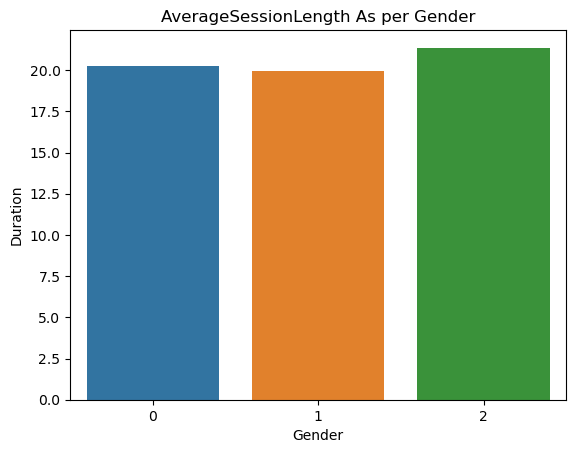

Gender
0    20.225967
1    19.936967
2    21.359464
Name: AverageSessionLength, dtype: float64

In [384]:
ASLGen=df.groupby("Gender")["AverageSessionLength"].agg(np.mean)
sns.barplot(x=ASLGen.index,y=ASLGen.values)
plt.title("AverageSessionLength As per Gender")
plt.xlabel("Gender")
plt.ylabel("Duration")
plt.show()
ASLGen

8. Correlation between different data in dataframe

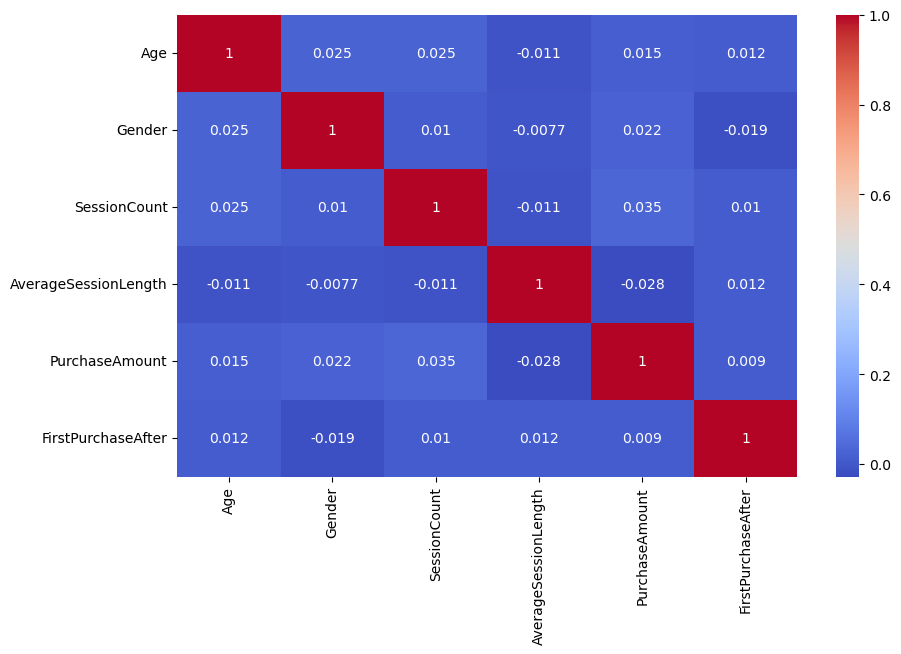

In [385]:
plt.figure(figsize=(10, 6))
cols=["Age","SessionCount","PurchaseAmount","FirstPurchaseAfter"]
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

9. Change the type of "FirstPurchaseAfter" to Date-Time object as required

In [386]:
#The values are currently integer , so we need to convert it into time delta format
df["FirstPurchaseAfter"]=pd.to_timedelta(df["FirstPurchaseAfter"],unit="D")
df


,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,PurchaseAmount,FirstPurchaseAfter,PaymentMethod
0,49,1,Norway,Android,Battle Royale,9,12.83,Minnow,912.0,28 days,Apple Pay
1,15,1,Switzerland,iOS,Action RPG,11,19.39,Minnow,509.6,18 days,Debit Card
2,23,1,China,Android,Fighting,9,8.87,Minnow,1264.8,30 days,Apple Pay
3,31,1,Mexico,Android,Racing,12,19.56,Minnow,1079.2,9 days,Debit Card
4,37,0,India,Android,Battle Royale,10,15.23,Minnow,868.8,15 days,Paypal
...,...,...,...,...,...,...,...,...,...,...,...
3019,19,0,Iran,Android,Fighting,7,34.81,Minnow,998.4,16 days,Google Pay
3020,48,1,Switzerland,iOS,Adventure,9,19.45,Minnow,1181.6,14 days,Carrier Billing
3021,44,1,France,Android,Card,15,20.54,Minnow,1335.2,24 days,Gift Card
3022,45,1,Sweden,iOS,Fighting,8,14.48,Minnow,1383.2,15 days,Paypal


10. Change "AverageSessionLength" to time format

In [387]:
# df["AverageSessionLength"]=pd.to_timedelta(df["AverageSessionLength"],unit="m").dt.components["minutes"]
df["AverageSessionLength"]=pd.to_timedelta(df["AverageSessionLength"],unit="m")
df

,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,PurchaseAmount,FirstPurchaseAfter,PaymentMethod
0,49,1,Norway,Android,Battle Royale,9,0 days 00:12:49.800000,Minnow,912.0,28 days,Apple Pay
1,15,1,Switzerland,iOS,Action RPG,11,0 days 00:19:23.400000,Minnow,509.6,18 days,Debit Card
2,23,1,China,Android,Fighting,9,0 days 00:08:52.200000,Minnow,1264.8,30 days,Apple Pay
3,31,1,Mexico,Android,Racing,12,0 days 00:19:33.600000,Minnow,1079.2,9 days,Debit Card
4,37,0,India,Android,Battle Royale,10,0 days 00:15:13.800000,Minnow,868.8,15 days,Paypal
...,...,...,...,...,...,...,...,...,...,...,...
3019,19,0,Iran,Android,Fighting,7,0 days 00:34:48.600000,Minnow,998.4,16 days,Google Pay
3020,48,1,Switzerland,iOS,Adventure,9,0 days 00:19:27,Minnow,1181.6,14 days,Carrier Billing
3021,44,1,France,Android,Card,15,0 days 00:20:32.400000,Minnow,1335.2,24 days,Gift Card
3022,45,1,Sweden,iOS,Fighting,8,0 days 00:14:28.800000,Minnow,1383.2,15 days,Paypal


11. Money spent based on Game Genre

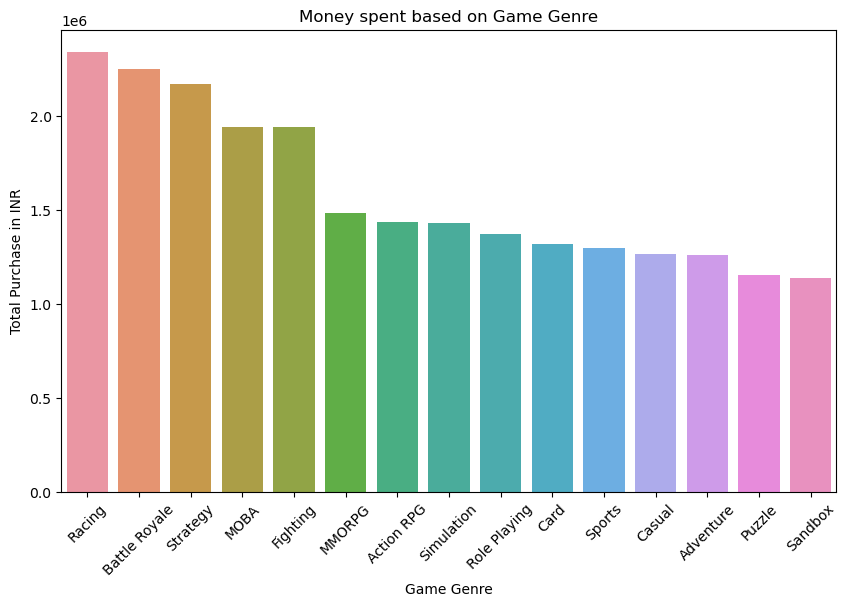

GameGenre
Racing           2341706.8
Battle Royale    2253323.2
Strategy         2173951.6
MOBA             1942879.2
Fighting         1942855.6
MMORPG           1485128.8
Action RPG       1437211.2
Simulation       1432958.8
Role Playing     1372024.8
Card             1318078.0
Sports           1300138.0
Casual           1269373.2
Adventure        1264660.8
Puzzle           1154370.8
Sandbox          1142372.0
Name: PurchaseAmount, dtype: float64

In [388]:
mgg=df.groupby(by="GameGenre")["PurchaseAmount"].agg(np.sum).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=mgg.index,y=mgg.values)
plt.xlabel("Game Genre")
plt.xticks(rotation=45)
plt.ylabel("Total Purchase in INR")
plt.title("Money spent based on Game Genre")
plt.show()
mgg

12. Check for duplicate data

In [389]:
df.duplicated().sum()
df

,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,PurchaseAmount,FirstPurchaseAfter,PaymentMethod
0,49,1,Norway,Android,Battle Royale,9,0 days 00:12:49.800000,Minnow,912.0,28 days,Apple Pay
1,15,1,Switzerland,iOS,Action RPG,11,0 days 00:19:23.400000,Minnow,509.6,18 days,Debit Card
2,23,1,China,Android,Fighting,9,0 days 00:08:52.200000,Minnow,1264.8,30 days,Apple Pay
3,31,1,Mexico,Android,Racing,12,0 days 00:19:33.600000,Minnow,1079.2,9 days,Debit Card
4,37,0,India,Android,Battle Royale,10,0 days 00:15:13.800000,Minnow,868.8,15 days,Paypal
...,...,...,...,...,...,...,...,...,...,...,...
3019,19,0,Iran,Android,Fighting,7,0 days 00:34:48.600000,Minnow,998.4,16 days,Google Pay
3020,48,1,Switzerland,iOS,Adventure,9,0 days 00:19:27,Minnow,1181.6,14 days,Carrier Billing
3021,44,1,France,Android,Card,15,0 days 00:20:32.400000,Minnow,1335.2,24 days,Gift Card
3022,45,1,Sweden,iOS,Fighting,8,0 days 00:14:28.800000,Minnow,1383.2,15 days,Paypal


13. Get the statistical description of the dataset using the .describe() method.

In [390]:
df.describe()

,Age,Gender,SessionCount,AverageSessionLength,PurchaseAmount,FirstPurchaseAfter
count,3024.000000,3024.000000,3024.000000,3024,3024.000000,3024
mean,33.523148,0.635582,10.074735,0 days 00:20:04.438690476,7880.632540,15 days 09:52:51.428571428
std,11.872885,0.518405,3.115863,0 days 00:08:35.112490999,35551.930602,8 days 17:50:44.490795965
min,13.000000,0.000000,1.000000,0 days 00:05:00.600000,0.000000,0 days 00:00:00
25%,24.000000,0.000000,8.000000,0 days 00:12:40.800000,492.600000,8 days 00:00:00
50%,33.000000,1.000000,10.000000,0 days 00:20:18.900000,958.000000,16 days 00:00:00
75%,44.000000,1.000000,12.000000,0 days 00:27:25.200000,1404.200000,23 days 00:00:00
max,54.000000,2.000000,22.000000,0 days 00:34:59.400000,397156.000000,30 days 00:00:00


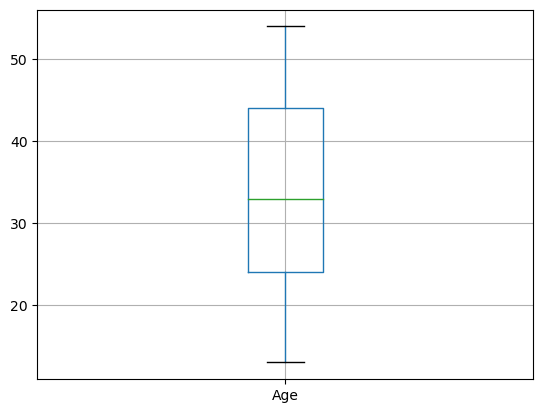

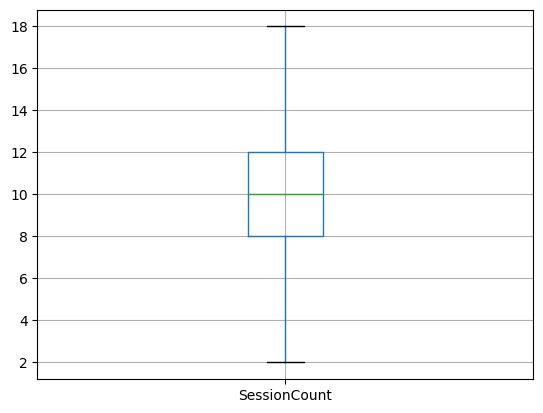

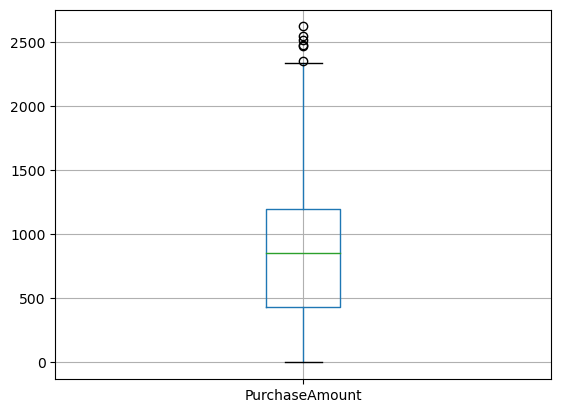

In [391]:
# numeric_df = df.select_dtypes(include=['number'])
# numeric_df
ndf=["Age","SessionCount","PurchaseAmount"]
for i in ndf:

    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    lbound=q1-1.5*iqr
    ubound=q3+1.5*iqr

    df3=df[(df[i]>=lbound) & (df[i]<=ubound)]
    df3[[i]].boxplot()
    plt.show()